In [1]:
# Utilizamos JupyterLab para simular un perceptron.
# Utilizaremos el famoso datset iris  (https://www.kaggle.com/uciml/iris)

# The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic 
# Problems, and can also be found on the UCI Machine Learning Repository.

# It includes three iris species with 50 samples each as well as some properties about each flower. One flower 
#species is linearly separable from the other two, but the other two are not linearly separable from each other.

# The columns in this dataset are:

# Id
# SepalLengthCm
# SepalWidthCm
# PetalLengthCm
# PetalWidthCm
# Species variable clase!



# Instalacion de paquetes y dependencias (esto debe ejecutarse en el terminal)
# pip install keras
# pip install tensorflow
# pip install numpy
# pip install scipy

# De todas formas, si esta con ANACONDA, sugiero instalar tensorflow desde la aplicación anaconda. 
# Si numpy y scipy no están instaladas, hacerlo via anaconda.

In [2]:
# Carga de paquetes y dependencias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [3]:
# Carga de los datos
# https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

from sklearn.datasets import load_iris
data = load_iris()




In [4]:
#print(data)

# vemos en las columnas el SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
# y en target, la variable clase: 0 (setosa), 1 (versicolor), 2 (virginica).

print(data.data)
#print(data.target)

# Recurso adicional:
# https://www.kaggle.com/zahoorahmad/tensorflow-and-keras-on-iris-dataset

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
# seleccionamos los atributos de entrada X  y la clase Y

X = data.data
Y = data.target

In [7]:
#len(X)
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [14]:
# Ahora creamos el modelo y agregamos el perceptron, es cual es una Dense layer

model = Sequential()
# incializamos así:
# model.add(Dense(units = 1, activation='hard_sigmoid'))

#model.add(Dense(1, input_shape=(8,), activation=hard_sigmoid, kernel_initializer='glorot_uniform'))
model.add(Dense(1, input_shape=(4,), activation='hard_sigmoid', kernel_initializer='random_uniform'))

# Ahora compilamos el modelo y lo inicializamos
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [15]:
# hacemos fit de datos en este psudo perceptron (entrenamiento).
# Presentamos los datos a nuestro pseudo perceptron. Esto le dice a Keras que comience el proceso de 
# entrenamiento.
    
history = model.fit(X, Y, epochs=225, batch_size=25, verbose=1, validation_split=0.2)


Train on 120 samples, validate on 30 samples
Epoch 1/225
120/120 [==============================] - 1s 10ms/sample - loss: 0.6325 - accuracy: 0.4167 - val_loss: 0.3169 - val_accuracy: 0.0000e+00
Epoch 2/225
120/120 [==============================] - 0s 473us/sample - loss: 0.6132 - accuracy: 0.4167 - val_loss: 0.2269 - val_accuracy: 0.0000e+00
Epoch 3/225
120/120 [==============================] - 0s 448us/sample - loss: 0.5976 - accuracy: 0.4167 - val_loss: 0.1310 - val_accuracy: 0.0000e+00
Epoch 4/225
120/120 [==============================] - 0s 411us/sample - loss: 0.5801 - accuracy: 0.4167 - val_loss: 0.0365 - val_accuracy: 0.0000e+00
Epoch 5/225
120/120 [==============================] - 0s 386us/sample - loss: 0.5635 - accuracy: 0.4167 - val_loss: -0.0582 - val_accuracy: 0.0000e+00
Epoch 6/225
120/120 [==============================] - 0s 436us/sample - loss: 0.5484 - accuracy: 0.4167 - val_loss: -0.1543 - val_accuracy: 0.0000e+00
Epoch 7/225
120/120 [===========================

Text(0, 0.5, 'Accuracy')

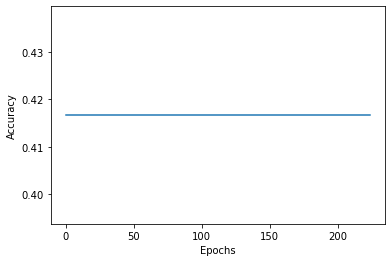

In [16]:
# Veamos cómo se desarrolla el accuracy en las iteraciones

import matplotlib.pyplot as plt #cargamos paquete para graficar

epochs = range(len(history.epoch))  #creamos un vector rango de 0 a 255

plt.figure()
plt.plot(epochs, history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

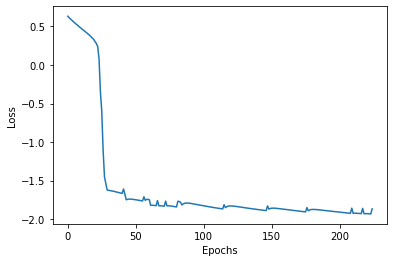

In [17]:
# Veamos un plot de la funcion de perdida a traves de las iteraciones

plt.figure()
plt.plot(epochs, history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [18]:
# recuperemos los pesos

#extract weights and bias from model
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

w1 = weights[0][0] #a
w2 = weights[1][0] #b
w3 = weights[2][0] #c
b = biases[0]      #d

In [22]:
# vamos a tratar de graficar el plani discriminador del perceptron:

# construir hiperplano ax + by + cz = d
a,b,c,d = w1,w2,w3,b

# tomemos como eje x el SepalLengthCm

x_min = data.data[:,0].min()
x_max = data.data[:,0].max()

#x_min = ds.BMI.min()
#x_max = ds.BMI.max()

x = np.linspace(x_min, x_max, 100)

# tomemos como eje y el SepalWidthCm
y_min = data.data[:,1].min()
y_max = data.data[:,1].max()


#y_min = ds.DiabetesPedigreeFunction.min()
#y_max = ds.DiabetesPedigreeFunction.max()

y = np.linspace(y_min, y_max, 100)


Xs,Ys = np.meshgrid(x,y)
Zs = (d - a*Xs - b*Ys) / c

In [23]:
Zs

array([[-2.00951165, -2.02434788, -2.03918411, ..., -3.44862591,
        -3.46346214, -3.47829837],
       [-2.01569656, -2.03053279, -2.04536902, ..., -3.45481082,
        -3.46964705, -3.48448328],
       [-2.02188147, -2.0367177 , -2.05155393, ..., -3.46099573,
        -3.47583196, -3.49066819],
       ...,
       [-2.60944787, -2.6242841 , -2.63912033, ..., -4.04856213,
        -4.06339836, -4.07823459],
       [-2.61563278, -2.63046901, -2.64530524, ..., -4.05474704,
        -4.06958327, -4.0844195 ],
       [-2.62181769, -2.63665392, -2.65149015, ..., -4.06093195,
        -4.07576818, -4.09060441]])

Text(0.5, 0, 'PetalLengthCm')

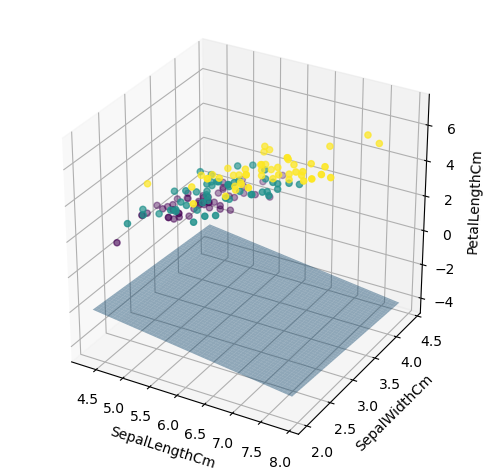

In [25]:
# ahora graficamos

#visualize 3d scatterplot with hyperplane
fig = plt.figure(num=None, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')

ax.plot_surface(Xs, Ys, Zs, alpha=0.45)

ax.scatter(data.data[:,0], data.data[:,1], data.data[:,2], c=data.target)
#ax.scatter(ds.BMI, ds.DiabetesPedigreeFunction, ds.Glucose, c=ds.Outcome)

ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('PetalLengthCm')